In [2]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [3]:
out = pathlib.Path("../jz_out")

In [4]:
runs_e01 = {
    "pair_diff": out / "gains/constant/e-01",
    "iqu_fit": out / "gains/constant/iqu/e-01",
    "no_atm": out / "gains/constant/noatm/e-01",
    "noatm_nohwp": out / "gains/constant/noatm_nohwp/e-01",
}
runs_e02 = {
    "pair_diff": out / "gains/constant/e-02",
    "iqu_fit": out / "gains/constant/iqu/e-02",
    "no_atm": out / "gains/constant/noatm/e-02",
    "noatm_nohwp": out / "gains/constant/noatm_nohwp/e-02",
    "nohwp": out / "gains/constant/nohwp/e-02",
}
runs_e02_random = {
    "pair_diff": out / "gains/random/e-02",
    "iqu_fit": out / "gains/random/iqu/e-02",
    # "no_atm": out / "gains/random/noatm/e-02",
    # "noatm_nohwp": out / "gains/random/noatm_nohwp/e-02",
    # "nohwp": out / "gains/random/nohwp/e-02",
}

In [5]:
def get_cells(run: pathlib.Path):
    cldir = run / "spectra"
    return {
        "full": np.load(cldir / "full_cl_more_hits.npz"),
        "noise": np.load(cldir / "noise_cl_more_hits.npz"),
    }

In [6]:
cells_e01 = {k: get_cells(v) for k, v in runs_e01.items()}
cells_e02 = {k: get_cells(v) for k, v in runs_e02.items()}
cells_e02_random = {k: get_cells(v) for k, v in runs_e02_random.items()}

In [7]:
cells_baseline = {
    "full": np.load(out / "baseline/spectra/full_cl_more_hits.npz"),
    "noise": np.load(out / "baseline/spectra/noise_cl_more_hits.npz"),
}

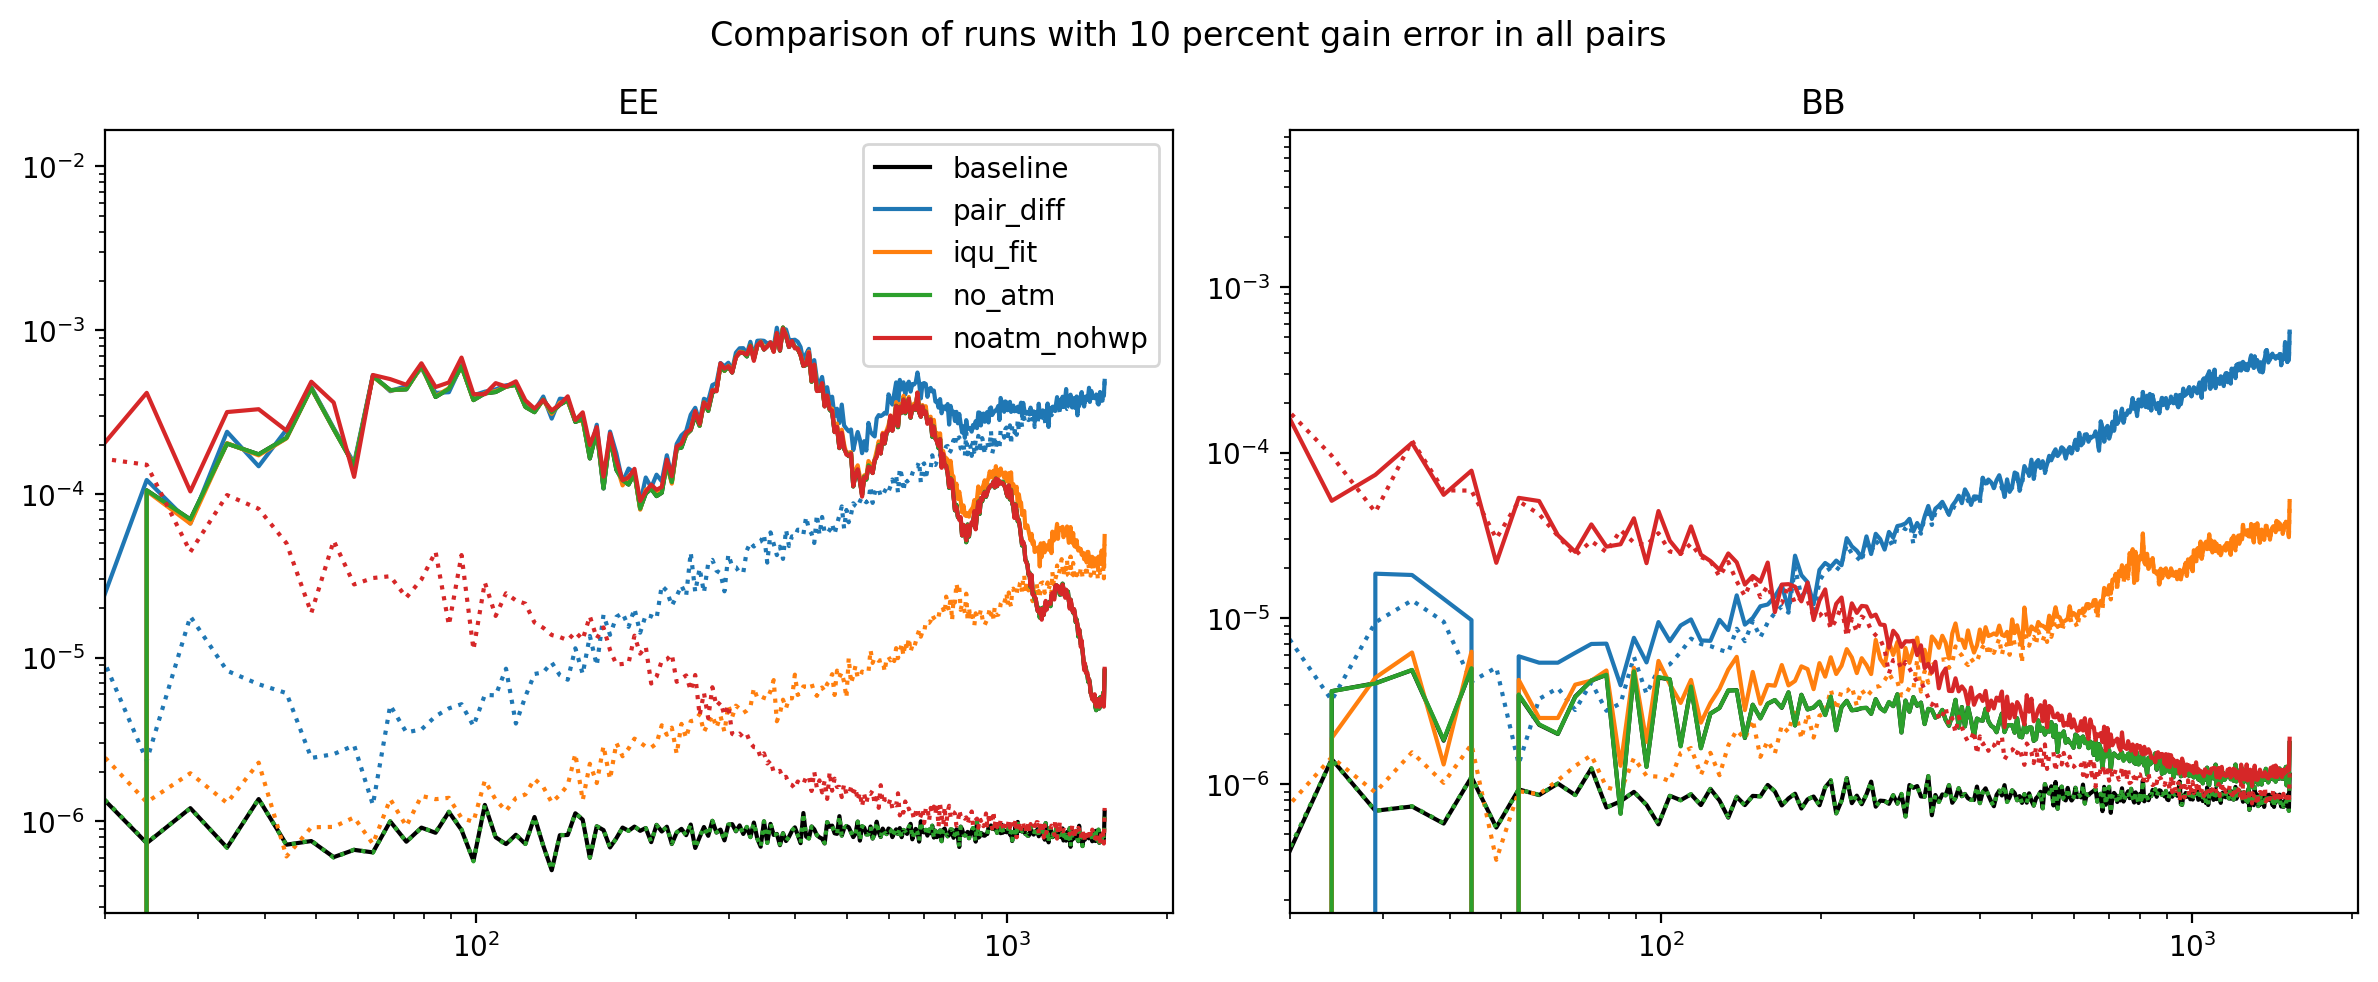

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Comparison of runs with 10 percent gain error in all pairs")
axs[0].set_title("EE")
axs[1].set_title("BB")
ell_arr = cells_baseline["full"]["ell_arr"]
for ax, idx in zip(axs, [0, 3]):
    ax.plot(ell_arr, cells_baseline["full"]["cl_22"][idx], "k", label="baseline")
    ax.plot(ell_arr, cells_baseline["noise"]["cl_22"][idx], "k")
for k in cells_e01:
    for ax, idx in zip(axs, [0, 3]):
        line = ax.plot(ell_arr, cells_e01[k]["full"]["cl_22"][idx], ls="solid", label=k)
        ax.plot(
            ell_arr,
            cells_e01[k]["noise"]["cl_22"][idx],
            ls="dotted",
            color=line[-1].get_color(),
        )
for ax in axs.flat:
    ax.loglog()
    ax.set_xlim(left=20)
axs[0].legend()
fig.tight_layout()
plt.show()

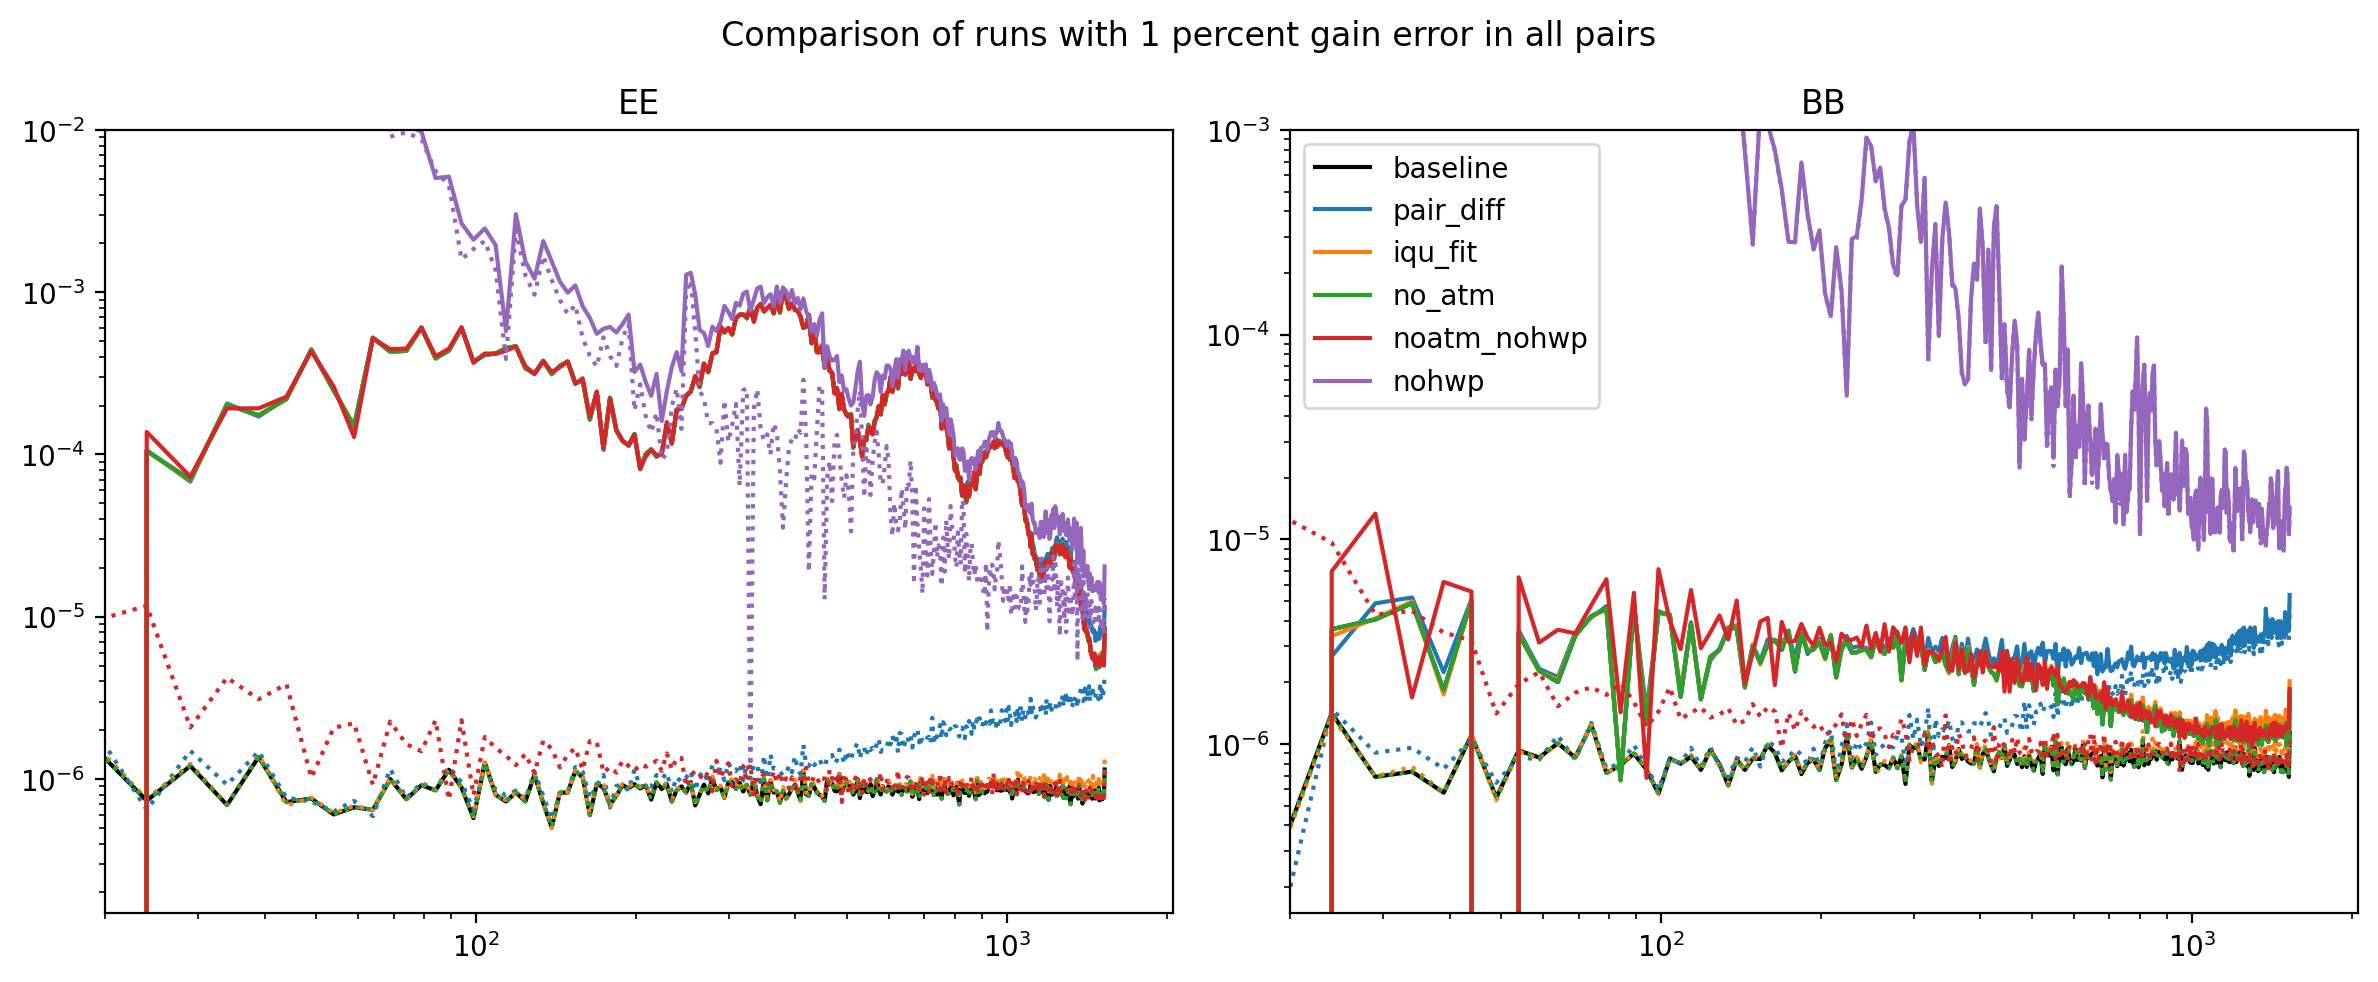

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Comparison of runs with 1 percent gain error in all pairs")
axs[0].set_title("EE")
axs[1].set_title("BB")
ell_arr = cells_baseline["full"]["ell_arr"]
for ax, idx in zip(axs, [0, 3]):
    ax.plot(ell_arr, cells_baseline["full"]["cl_22"][idx], "k", label="baseline")
    ax.plot(ell_arr, cells_baseline["noise"]["cl_22"][idx], "k")
for k in cells_e02:
    for ax, idx in zip(axs, [0, 3]):
        line = ax.plot(ell_arr, cells_e02[k]["full"]["cl_22"][idx], ls="solid", label=k)
        ax.plot(
            ell_arr,
            cells_e02[k]["noise"]["cl_22"][idx],
            ls="dotted",
            color=line[-1].get_color(),
        )
for ax in axs.flat:
    ax.loglog()
    ax.set_xlim(left=20)
axs[0].set_ylim(bottom=1.5e-7, top=1e-2)
axs[1].set_ylim(bottom=1.5e-7, top=1e-3)
axs[1].legend()
fig.tight_layout()
plt.show()

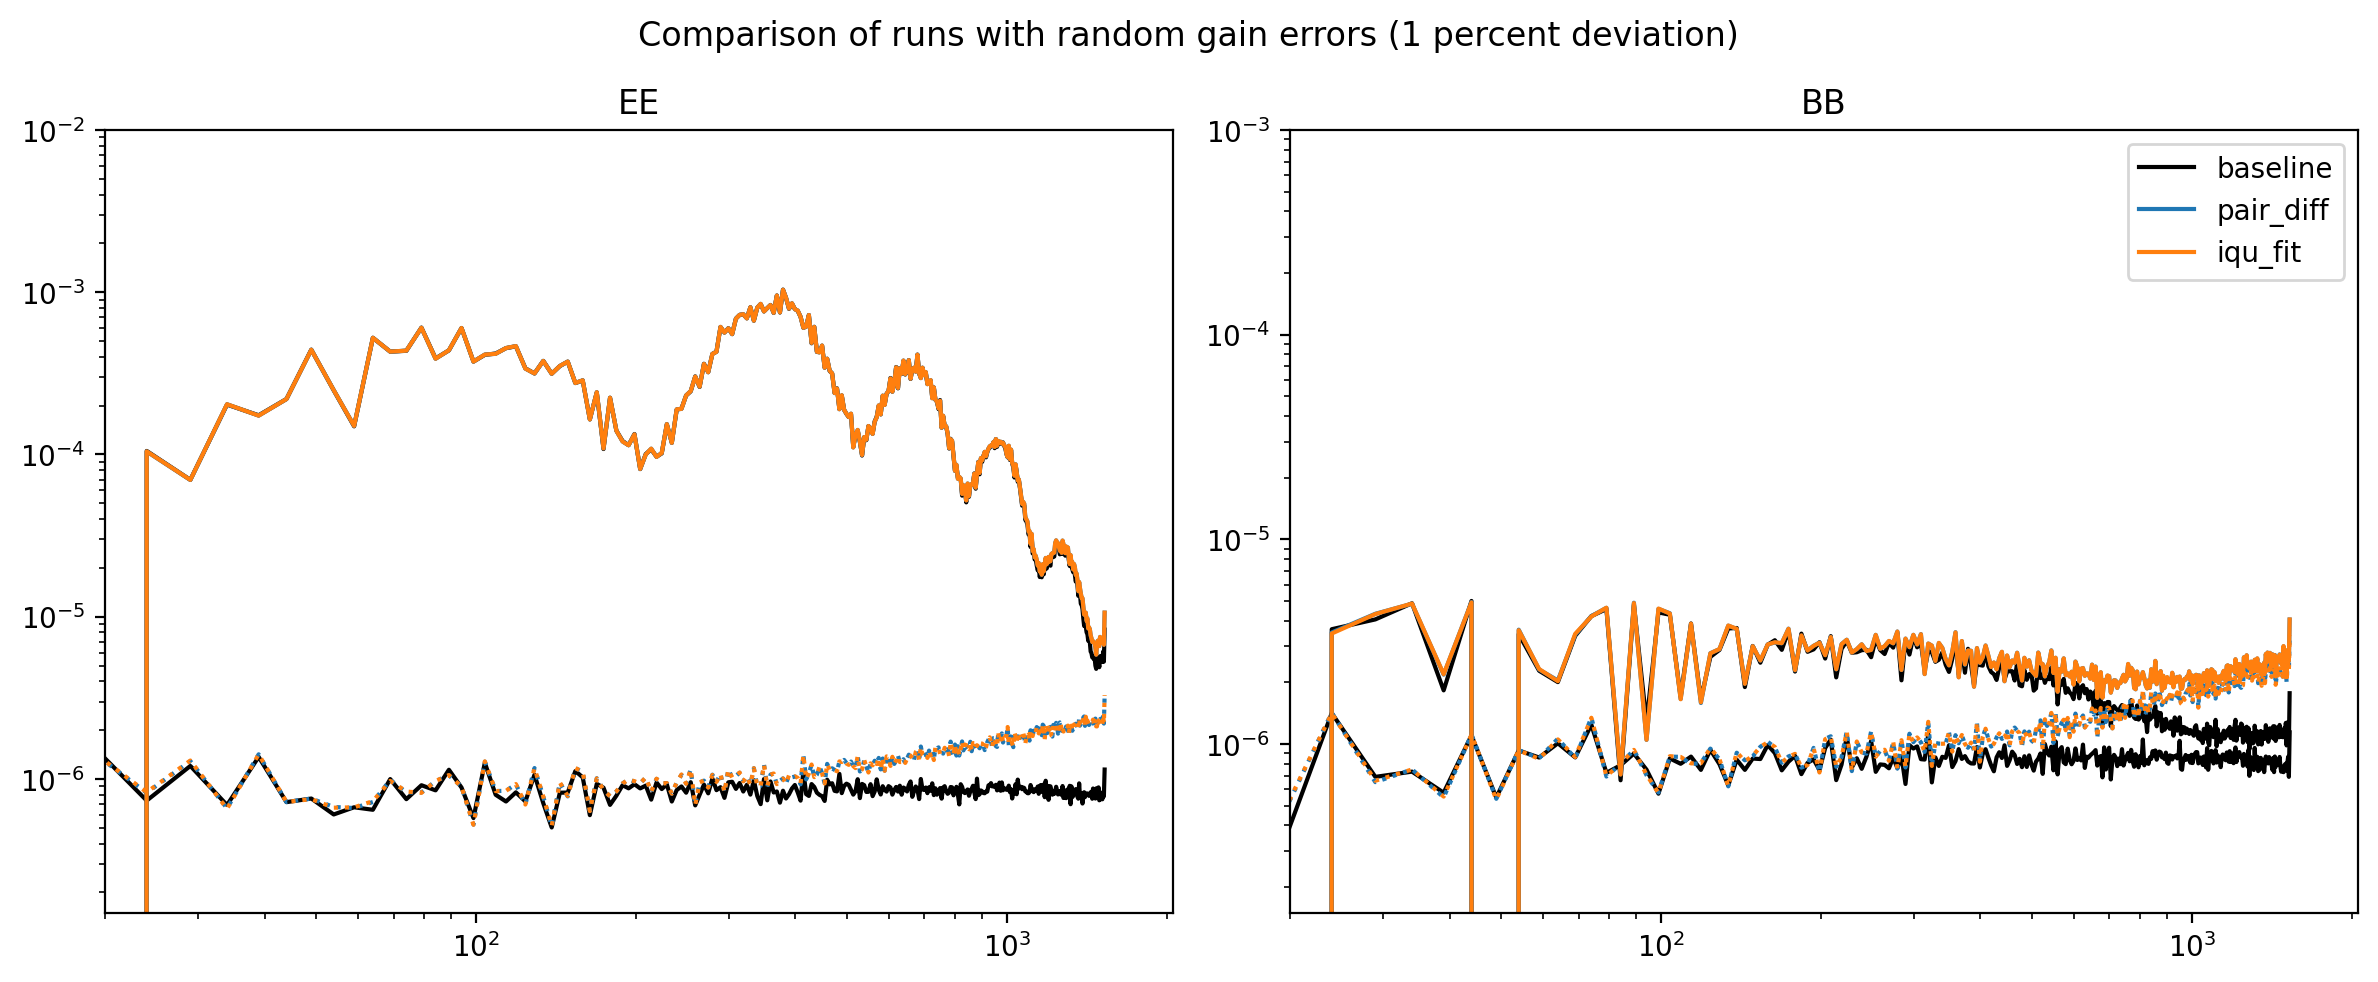

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Comparison of runs with random gain errors (1 percent deviation)")
axs[0].set_title("EE")
axs[1].set_title("BB")
ell_arr = cells_baseline["full"]["ell_arr"]
for ax, idx in zip(axs, [0, 3]):
    ax.plot(ell_arr, cells_baseline["full"]["cl_22"][idx], "k", label="baseline")
    ax.plot(ell_arr, cells_baseline["noise"]["cl_22"][idx], "k")
for k in cells_e02_random:
    for ax, idx in zip(axs, [0, 3]):
        line = ax.plot(ell_arr, cells_e02_random[k]["full"]["cl_22"][idx], ls="solid", label=k)
        ax.plot(
            ell_arr,
            cells_e02_random[k]["noise"]["cl_22"][idx],
            ls="dotted",
            color=line[-1].get_color(),
        )
for ax in axs.flat:
    ax.loglog()
    ax.set_xlim(left=20)
axs[0].set_ylim(bottom=1.5e-7, top=1e-2)
axs[1].set_ylim(bottom=1.5e-7, top=1e-3)
axs[1].legend()
fig.tight_layout()
plt.show()